In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from IPython.display import display
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.svm import SVC 
from sklearn import linear_model
from sklearn.externals import joblib 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
final_df = pd.read_pickle('drive/My Drive/caseStudy1.pkl')

In [5]:
final_df.head()

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,FIRE_YEAR,STAT_CAUSE_CODE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,STATE,DISCOVERY_MONTH,DISCOVERY_TOD,STATE_PRCNT_FOREST,AVG_TEMP,AVG_PREC
0,0,2,5,2005,9.0,1,40.0,-121.1,5.0,4,2,3,32.71,58.6,22.97
1,0,2,5,2004,1.0,1,38.9,-120.5,5.0,4,5,2,32.71,58.9,22.97
2,0,2,5,2004,5.0,1,38.9,-120.8,13.0,4,5,4,32.71,58.9,22.97
3,0,2,5,2004,1.0,1,38.5,-120.0,5.0,4,6,3,32.71,58.9,22.97
4,0,2,5,2004,1.0,1,38.5,-120.0,5.0,4,6,3,32.71,58.9,22.97


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SOURCE_SYSTEM_TYPE     int64  
 1   SOURCE_SYSTEM          int64  
 2   NWCG_REPORTING_AGENCY  int64  
 3   FIRE_YEAR              int64  
 4   STAT_CAUSE_CODE        float64
 5   FIRE_SIZE_CLASS        int64  
 6   LATITUDE               float64
 7   LONGITUDE              float64
 8   OWNER_CODE             float64
 9   STATE                  int64  
 10  DISCOVERY_MONTH        int64  
 11  DISCOVERY_TOD          int64  
 12  STATE_PRCNT_FOREST     float64
 13  AVG_TEMP               float64
 14  AVG_PREC               float64
dtypes: float64(7), int64(8)
memory usage: 215.2 MB


In [7]:
#Breaking down data into train and test 
y = final_df['FIRE_SIZE_CLASS'].values
x = final_df.drop(['FIRE_SIZE_CLASS'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

Since the features we are dealing with are geospatial features, therefore we cannot just normalize/scale the features (such as latitude, longitude)
So we cannot use linear models which require scaled features as input to the model.

Reference: https://heartbeat.fritz.ai/working-with-geospatial-data-in-machine-learning-ad4097c7228d

Taking reference from above URL, Tree based/grouping models can be a good solution to this problem as they will preserve the original values of the features and would provide the output without any modifications in input model.

So starting with the Simplest Model that works on the concept of neighborhood i.e. KNN.
We are using the models here without any hyperparameter tuning just to understand which model works better as it is.


In [9]:
#Funstion for MAPE error to be used further
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
#Randomly taking nearest neighbors to be 5 here
knnModel = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train) 

In [12]:
#Using the model for predicting values of Test data
knn_predictions = knnModel.predict(x_test)  

#Fining accuracy of the Model
accuracy_train = knnModel.score(x_train, y_train) 
accuracy_test = knnModel.score(x_test, y_test) 

print('Train Data Accuracy is :',accuracy_train)
print('Test Data Accuracy is :',accuracy_test)

#Finding MAE
knn_MAE = mean_absolute_error(y_test, knn_predictions)
print('MAE value is: ', knn_MAE)

#Finding MAPE
knn_MAPE = mean_absolute_percentage_error(y_test, knn_predictions)
print('MAPE value is: ', knn_MAPE)


Train Data Accuracy is : 0.7154648225152411
Test Data Accuracy is : 0.6048933694730837
MAE value is:  0.4705086100484406
MAPE value is:  25.54309958367461


In [13]:
#Now applying  Gaussian Naive Bayes as it does not require any normalization too
gnb = GaussianNB().fit(x_train, y_train) 

In [14]:
gnb_predictions = gnb.predict(x_test) 
# accuracy on X_test 
accuracy_train = gnb.score(x_train, y_train) 
accuracy_test = gnb.score(x_test, y_test) 

print('Train Data Accuracy is :',accuracy_train)
print('Test Data Accuracy is :',accuracy_test)

#Finding MAE
gnb_MAE = mean_absolute_error(y_test, gnb_predictions)
print('MAE value is: ', gnb_MAE)

#Finding MAPE
gnb_MAPE = mean_absolute_percentage_error(y_test, gnb_predictions)
print('MAPE value is: ', gnb_MAPE)

Train Data Accuracy is : 0.5313295939157607
Test Data Accuracy is : 0.5312720569039923
MAE value is:  0.8070433838151071
MAPE value is:  53.491671497219784


KNN is performing better than Naive Bayes, 
Now trying some tree based algorithms too.


In [15]:
decisionTreeModel = tree.DecisionTreeClassifier().fit(x_train, y_train)

In [16]:
decisionTreeModel_predictions = decisionTreeModel.predict(x_test) 
# accuracy on X_test 
accuracy_train = decisionTreeModel.score(x_train, y_train) 
accuracy_test = decisionTreeModel.score(x_test, y_test) 

print('Train Data Accuracy is :',accuracy_train)
print('Test Data Accuracy is :',accuracy_test)

#Finding MAE
decisionTreeModel_MAE = mean_absolute_error(y_test, decisionTreeModel_predictions)
print('MAE value is: ', decisionTreeModel_MAE)

#Finding MAPE
decisionTreeModel_MAPE = mean_absolute_percentage_error(y_test, decisionTreeModel_predictions)
print('MAPE value is: ', decisionTreeModel_MAPE)

Train Data Accuracy is : 0.9531022429362074
Test Data Accuracy is : 0.5552764143007699
MAE value is:  0.5531234993247969
MAPE value is:  32.28023707541204


Even though the MAE and MAPE values are greater than KNN model, But there is a huge difference in Train and Test acuracy, so the model is probably overfitting into the train data and the errors can therefore be improved by right hyperparameter tuning.

In [17]:
#Second tree based approach: Random Forest
rf_clf = RandomForestClassifier().fit(x_train, y_train) 


In [23]:
#Since the model training consumes a lot of RAM. Therefore storing it in a .pkl file for further use.
joblib.dump(rf_clf, 'drive/My Drive/randomForestModel.pkl')

['drive/My Drive/randomForestModel.pkl']

In [20]:
rf_predictions = rf_clf.predict(x_test) 
# accuracy on X_test 
accuracy_train = rf_clf.score(x_train, y_train) 
accuracy_test = rf_clf.score(x_test, y_test) 

print('Train Data Accuracy is :',accuracy_train)
print('Test Data Accuracy is :',accuracy_test)

#Finding MAE
rf_MAE = mean_absolute_error(y_test, rf_predictions)
print('MAE value is: ', rf_MAE)

#Finding MAPE
rf_MAPE = mean_absolute_percentage_error(y_test, rf_predictions)
print('MAPE value is: ', rf_MAPE)

Train Data Accuracy is : 0.9530895436264942
Test Data Accuracy is : 0.6186053107384691
MAE value is:  0.45348350022721634
MAPE value is:  25.295920296717977


The Difference between train and test data accuracy is very high, therefore it is an over fitting situation which we can overcome by hyper parameter tuning. 
The errors would further decrease when we would make class_weights to be 'balanced' as our data is highly imbalanced.

Therefore, we can use random forest as our final model and perform hyper parameter tuning on it to reduce the results further.

Even after overfitting, the MAE and MAPE values are the least with Random Forest and also if we compare the results with the reference research paper (Result image attached), the Error values are already much lesser than it.
This is because we have added additional weather features using feature engineering which improved our results.

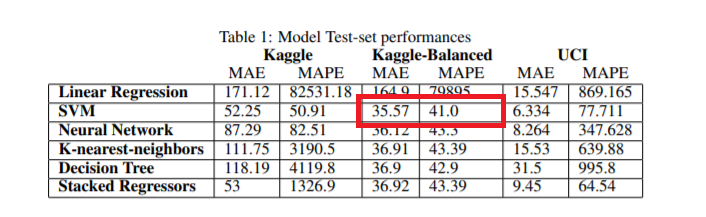

Therefore we can use Random Forest and KNN further and do hyper parameter tuning. Then as per the results we can finalize the model for this project.
 

